In [34]:
from abr.Abr import ABR
from arbre234.Arbre234 import Arbre234
from arbreB.ArbreB import ArbreB
from arbreDST.ArbreDst import ArbreDST
from arbreSplay.ArbreSplay import ArbreSplay
from arbreAVL.ArbreAVL import ArbreAVL
from rtrie.RTrie import RTrie


#...

### Graphviz

In [4]:
def graph_tas_min(tas):
    dot = Digraph()
    
    def traverse(index):
        if index < len(tas.tas):
            dot.node(str(tas.tas[index]), str(tas.tas[index]))
            
            gauche = 2 * index + 1
            droite = 2 * index + 2
            
            if gauche < len(tas.tas):
                dot.edge(str(tas.tas[index]), str(tas.tas[gauche]), label="L", style="dashed")
                traverse(gauche)
            
            if droite < len(tas.tas):
                dot.edge(str(tas.tas[index]), str(tas.tas[droite]), label="R", style="solid")
                traverse(droite)
    
    traverse(0)
    return dot


##  ABR, Arbre AVL, Arbre Splay, ..?
def graph_arbre_binaire(racine):
    dot = Digraph()
    
    def traverse(noeud):
        if noeud is None:
            return

        dot.node(str(noeud.cle), str(noeud.cle))
        
        if noeud.gauche is not None:
            dot.edge(str(noeud.cle), str(noeud.gauche.cle), label="L", style="dashed")
            traverse(noeud.gauche)
        
        if noeud.droite is not None:
            dot.edge(str(noeud.cle), str(noeud.droite.cle), label="R", style="solid")
            traverse(noeud.droite)
    
    traverse(racine)
    return dot

## File binomiale
def graph_file_binomiale(file):
    dot = Digraph()

    def traverse(arbre):
        if arbre is None:
            return

        dot.node(str(arbre.cle), label=str(arbre.cle))

        for enfant in arbre.enfants:
            dot.edge(str(arbre.cle), str(enfant.cle))
            traverse(enfant)

    for arbre in file.arbres:
        traverse(arbre)

    return dot

## other tree ?
#...

# Table des matières <a class="anchor" id="menu"></a>
* [Tas Min](#tasmin)
* [File Binomiale](#filebino)
* [Arbre Binaire de Recherche (ABR)](#abr)
* [Arbre 2-3-4](#arbre234)
* [Arbre-B](#arbreb)
* [Arbre AVL](#avl)
* [Arbre Auto-adaptatif (Splay-tree)](#splaytree)
* [Arbre Digital (DST)](#dst)
* [Arbre Lexicographique](#lexico)
* [R-Trie](#rtrie)
* [Trie Hybride](#triehybr)

___
## Tas Min <a class="anchor" id="tasmin"></a>                                                                                                                                  
#### [Retour](#menu) 



In [36]:

class TasMin:
    def __init__(self):
        self.tas = [] 

    # Ajout
    
    def ajout_liste(self, cles: list) -> 'TasMin':
        '''Tas * list -> Tas'''
        '''Ajoute une liste de clés dans le tas et retourne un nouveau tas'''
        nouveauTas = self
        for cle in cles:
            nouveauTas = nouveauTas.ajout(cle)
        return nouveauTas
            
    def ajout(self, cle : int) -> 'TasMin':
        '''Tas * int -> Tas'''
        '''Ajoute une clé dans le tas et retourne un nouveau tas'''
        nouveauTas = TasMin()
        nouveauTas.tas = self.tas.copy()
        nouveauTas.tas = self._ajout(nouveauTas, cle)
        return nouveauTas
    
    def _ajout(self, tas : 'TasMin', cle : int) -> list:
        '''Tas * int -> list'''
        '''Ajoute une clé dans le tas et retourne le tas modifié'''
        tas.tas.append(cle)  # add the new key
        i = len(tas.tas) - 1
        # moves it up (swap with parent) until it satisfies the tas property
        while (i != 0) and tas.tas[i] < tas.tas[tas._parent(i)]:
            tas.tas[i], tas.tas[tas._parent(i)] = (
                tas.tas[tas._parent(i)], tas.tas[i])
            i = tas._parent(i)
        return tas.tas

    # SupprMin
    def extractMin(self) -> (int, 'TasMin'):
        '''Tas -> (int * Tas)'''
        '''Retourne la clé minimum et le tas sans le minimum '''
        if self.tas[0] is None:
            return None
        nouveauTas = TasMin()
        nouveauTas.tas = self.tas.copy()
        nouveauTas.tas[0], nouveauTas.tas[-1] = nouveauTas.tas[-1], nouveauTas.tas[0]
        racine = nouveauTas.tas.pop()
        nouveauTas._heapify(0)
        return racine, nouveauTas

    # Construction
    def construction(self, cles: list) -> 'TasMin':
        '''Tas * list -> Tas'''
        '''Construit un tas à partir d'une liste de clés et retourne un nouveau tas'''
        self.tas = cles
        n = len(self.tas)
        # opti = loop half : nodes, not leaves. second half contains leaves(=node without children)
        for i in range(n//2, -1, -1):
            self._heapify(i)
        return self

    # Union
    def union(tas1: 'TasMin', tas2: 'TasMin') -> 'TasMin':
        '''Tas * Tas -> Tas'''
        '''Retourne un nouveau tas qui est l'union de deux tas'''
        nouveauTas = TasMin()
        valeurs = tas1.tas + tas2.tas
        nouveauTas.construction(valeurs)
        return nouveauTas
    
    
    
    # Helper functions
    def _est_tas(self) -> bool: 
        '''Tas -> bool'''
        '''Retourne True si le tas est un tas, False sinon'''
        n = len(self.tas)
        for i in range(0, n//2):
            gauche = 2*i + 1
            droite = 2*i + 2
            if gauche < n and self.tas[gauche] < self.tas[i]:
                return False
            if droite < n and self.tas[droite] < self.tas[i]:
                return False
        return True
    
    def _parent(self, i: int) -> int:  
        '''Tas * int -> int'''
        '''Retourne l'index du parent de l'élément à l'index i'''
        # the floor division // rounds the result down to the nearest whole number
        return (i-1)//2

    # moves down the key at index i until it satisfies the tas property
    def _heapify(self, i: int) -> None:  
        '''Tas * int -> None'''
        '''Modifie le tas pour satisfaire la propriété de tas'''
        min = i
        gauche = 2 * i + 1
        droite = 2 * i + 2
        if gauche < len(self.tas) and self.tas[gauche] < self.tas[min]:
            min = gauche
        if droite < len(self.tas) and self.tas[droite] < self.tas[min]:
            min = droite
        if min != i:
            self.tas[i], self.tas[min] = (self.tas[min], self.tas[i])
            self._heapify(min)
            
            
    def visualiser(self):
        '''Tas -> dot'''
        '''Affiche le tas'''
        return graph_tas_min(self)


10
True


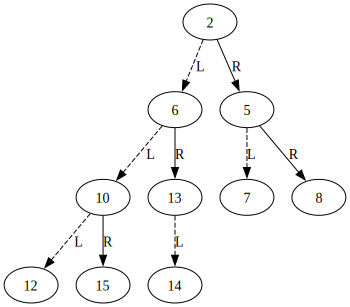

In [37]:
#exemple du cours
min_tas = TasMin()
min_tas = min_tas.ajout_liste([2 , 6 , 5 , 10 , 13 , 7 , 8 , 12 , 15 , 14])
print(len(min_tas.tas))
print(min_tas._est_tas())
dot = min_tas.visualiser()
dot

[2, 4, 5, 10, 6, 7, 8, 12, 15, 14, 13]
[2, 6, 5, 10, 13, 7, 8, 12, 15, 14]


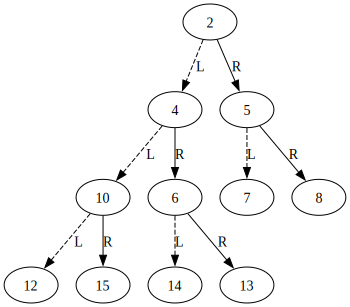

In [38]:
A = min_tas.ajout(4)
print(A.tas)
print(min_tas.tas)
dot = graph_tas_min(A) # modifie
dot

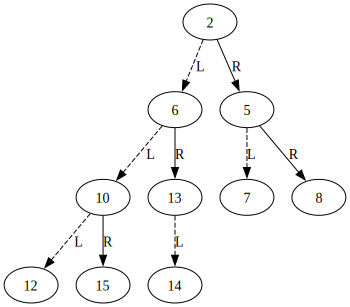

In [39]:
dot = graph_tas_min(min_tas) # non modifié
dot

2
[5, 6, 7, 10, 13, 14, 8, 12, 15]
[2, 6, 5, 10, 13, 7, 8, 12, 15, 14]


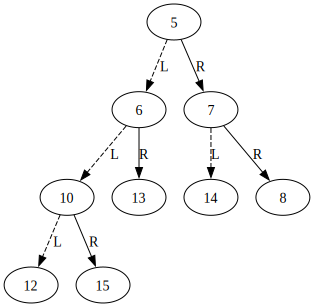

In [41]:
#exemple du cours
min_tas = TasMin()
min_tas = min_tas.ajout_liste([2 , 6 , 5 , 10 , 13 , 7 , 8 , 12 , 15 , 14])
min, A = min_tas.extractMin()
print(min)
print(A.tas)
print(min_tas.tas)
dot = graph_tas_min(A) # modifié
dot

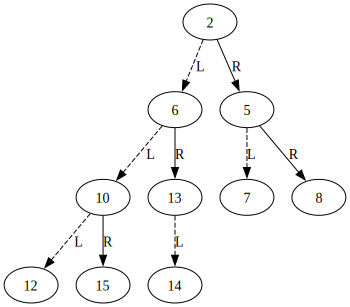

In [42]:
dot = graph_tas_min(min_tas) # non modifié
dot

## File Binomiale <a class="anchor" id="filebino"></a>

In [ ]:
from collections import deque
import copy

In [ ]:
class ArbreBinomial:
    def __init__(self, cle = None):
        self.cle = cle
        self.parent = None
        self.enfants = deque()
        self.degre = 0
    
    def estVide(self) -> bool:
        '''ArbreBinomial -> bool'''
        '''Verifie si l'arbre est vide ou non'''
        return self.cle is None
    
    def union_arbre(self, arbre: 'ArbreBinomial') -> 'ArbreBinomial':
        '''ArbreBinomial * ArbreBinomial -> ArbreBinomial'''
        '''Union de deux arbres binomiaux de même degré'''
        if (self.degre != arbre.degre):
            raise ValueError("Les arbres n'ont pas le même degré")
        if self.cle < arbre.cle:
            nouveauArbre = ArbreBinomial(self.cle)
            nouveauArbre.enfants = copy.deepcopy(self.enfants)
            nouveauArbre.enfants.appendleft(arbre)
            nouveauArbre.parent = self
            nouveauArbre.degre = self.degre + 1
            return nouveauArbre
        else:
            nouveauArbre = ArbreBinomial(arbre.cle)
            nouveauArbre.enfants = copy.deepcopy(arbre.enfants)
            nouveauArbre.enfants.appendleft(self)
            nouveauArbre.parent = arbre
            nouveauArbre.degre = arbre.degre + 1
            return nouveauArbre

    def decapiter(self) -> 'FileBinomiale':
        '''ArbreBinomial -> FileBinomiale'''
        '''Retire la racine de l'arbre et renvoie un file contenant les sous-arbres'''
        file = FileBinomiale()
        for enfant in self.enfants:
            enfant.parent = None
            file.arbres.append(enfant)
        return file

    def transformation_file(self) -> 'FileBinomiale':
        '''ArbreBinomial -> FileBinomiale'''
        '''Transforme un arbre en file'''
        file = FileBinomiale()
        file.arbres = [self]
        return file

class FileBinomiale:
    def __init__(self):
        self.arbres = deque()  # liste d'arbres binomiaux

    #AJOUT
    def ajout_liste(self, liste: list) -> 'FileBinomiale':
        '''FileBinomiale * list -> FileBinomiale'''
        '''Ajoute une liste de clés à la file'''
        file = self
        for cle in liste:
            file = file.ajout(cle)
        return file
    
    def ajout(self, cle) -> 'FileBinomiale':
        '''FileBinomiale * int -> FileBinomiale'''
        '''Ajoute une clé à la file'''
        nouvelleFile = FileBinomiale()
        nouvelleFile.arbres = copy.deepcopy(self.arbres)
        resultat = nouvelleFile.unionFile(ArbreBinomial(cle).transformation_file())
        nouvelleFile.arbres = resultat.arbres
        return resultat
    
    #SUPPRESSION
    def extraireMin(self) -> tuple[int, 'FileBinomiale']:
        '''FileBinomiale -> int * FileBinomiale'''
        '''Supprime et renvoie la clé minimale de la file'''
        nouvelleFile = FileBinomiale()
        nouvelleFile.arbres = copy.deepcopy(self.arbres)
        if self.estVide():
            return None
        arbreMin = nouvelleFile.arbres[0]
        for arbre in nouvelleFile.arbres:
            if arbre.cle < arbreMin.cle:
                arbreMin = arbre
        nouvelleFile.arbres.remove(arbreMin)
        if (len(nouvelleFile.arbres) == 0):
            nouvelleFile.arbres = arbreMin.decapiter().arbres
        else:
            nouvelleFile.arbres = FileBinomiale.unionFile(nouvelleFile, arbreMin.decapiter()).arbres
        return arbreMin.cle, nouvelleFile
    
    #UNION
    def unionFile(self, file: 'FileBinomiale') -> 'FileBinomiale':
        '''FileBinomiale * FileBinomiale -> FileBinomiale'''
        '''Union de deux files binomiales'''
        nouvelleFile = FileBinomiale()
        nouvelleFile.arbres = copy.deepcopy(self.arbres)
        resultat = FileBinomiale._union(nouvelleFile, file, ArbreBinomial())
        nouvelleFile.arbres = copy.deepcopy(resultat.arbres)
        return nouvelleFile

    def _union(file1: 'FileBinomiale', file2: 'FileBinomiale', arbre: 'ArbreBinomial') -> 'FileBinomiale':
        '''FileBinomiale * FileBinomiale * ArbreBinomial -> FileBinomiale'''
        '''Fonction auxiliaire pour l'union de deux files binomiales'''
        if arbre.estVide():
            if file1.estVide():
                return file2
            if file2.estVide():
                return file1

            arbre1 = file1.minDeg()
            arbre2 = file2.minDeg()

            if (arbre1.degre < arbre2.degre):
                return FileBinomiale._ajoutMin(FileBinomiale.unionFile(file1._reste(), file2), arbre1)
            if (arbre2.degre < arbre1.degre):
                return FileBinomiale._ajoutMin(FileBinomiale.unionFile(file1, file2._reste()), arbre2)
            if (arbre1.degre == arbre2.degre):
                return FileBinomiale._union(file1._reste(), file2._reste(), ArbreBinomial.union_arbre(arbre1, arbre2))
        else:
            if (file1.estVide()):
                return FileBinomiale.unionFile(file2, arbre.transformation_file())
            if (file2.estVide()):
                return FileBinomiale.unionFile(file1, arbre.transformation_file())

            arbre1 = file1.minDeg()
            arbre2 = file2.minDeg()

            if (arbre.degre < arbre1.degre and arbre.degre < arbre2.degre):
                return FileBinomiale._ajoutMin(FileBinomiale.unionFile(file1, file2), arbre)
            if (arbre.degre == arbre1.degre and arbre.degre == arbre2.degre):
                return FileBinomiale._ajoutMin(FileBinomiale._union(file1._reste(), file2._reste(), ArbreBinomial.union_arbre(arbre1, arbre2)), arbre)
            if (arbre.degre == arbre1.degre and arbre.degre < arbre2.degre):
                return FileBinomiale._union(file1._reste(), file2, ArbreBinomial.union_arbre(arbre1, arbre))
            if (arbre.degre == arbre2.degre and arbre.degre < arbre1.degre):
                return FileBinomiale._union(file1, file2._reste(), ArbreBinomial.union_arbre(arbre2, arbre))
            
    
    #FONCTIONS UTILES / PRIMITIVES
    def estVide(self) -> bool:
        '''FileBinomiale -> bool'''
        '''Verifie si la file est vide ou non'''
        return self is None or len(self.arbres) == 0

    def minDeg(self) -> 'ArbreBinomial':
        '''FileBinomiale -> ArbreBinomial'''
        '''Renvoie l'arbre de degré minimum de la file'''
        minDeg = self.arbres[0]
        for arbre in self.arbres:
            if arbre.degre < minDeg.degre:
                minDeg = arbre
        return minDeg
    
    def _reste(self) -> 'FileBinomiale':
        '''FileBinomiale -> FileBinomiale'''
        '''Retourne la file sans l'arbre de degré minimum'''
        minDeg = self.minDeg()
        self.arbres.remove(minDeg)
        return self
        
    def _ajoutMin(self, arbre: 'ArbreBinomial') -> 'FileBinomiale':
        '''FileBinomiale * ArbreBinomial -> FileBinomiale'''
        '''Ajoute un arbre à la file'''
        nouvelleFile = FileBinomiale()
        nouvelleFile.arbres = copy.deepcopy(self.arbres)
        nouvelleFile.arbres.append(arbre)
        return nouvelleFile


    


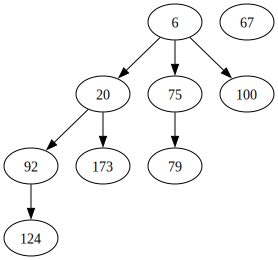

In [ ]:
#exemple de https://www.chrislaux.com/binomialheap
# et https://www.cs.usfca.edu/~galles/visualization/BinomialQueue.html
file = FileBinomiale()


file = file.ajout_liste([173,20,92,124,100,6,79,75,67])

dot = graph_file_binomiale(file)
dot

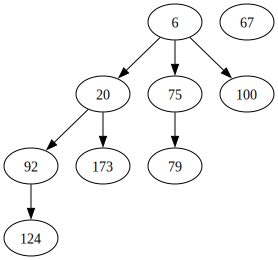

In [ ]:
A = file.ajout(60) # Ajout de 60 dans A, file n'est pas modifié
dot = graph_file_binomiale(file)
dot

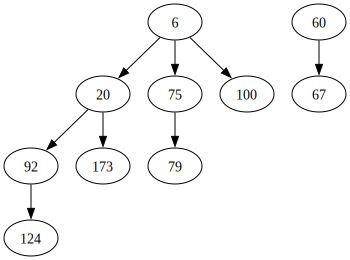

In [ ]:
dot = graph_file_binomiale(A) # A est modifié
dot

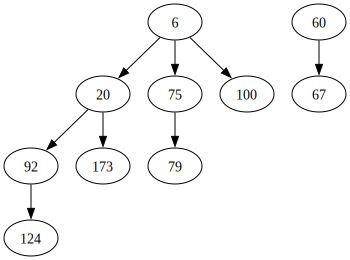

In [ ]:
e,B = A.extractMin() # Extraction du minimum de A = 6
dot = graph_file_binomiale(A) # A n'est pas modifié
dot

6


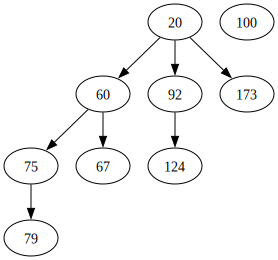

In [ ]:
print(e)
dot = graph_file_binomiale(B) # B est modifié
dot

20


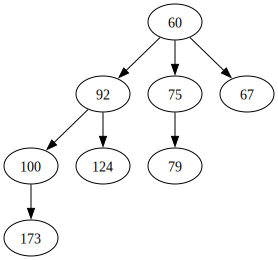

In [ ]:
e,C = B.extractMin() # Extraction du minimum de A = 6
print(e)
dot = graph_file_binomiale(C) # A n'est pas modifié
dot

## Arbre Binaire de Recherche (ABR) <a class="anchor" id="abr"></a>

In [6]:
class ArbreBinaire:
    def __init__(self, cle: int, gauche = None, droite = None) -> None:
        self.cle = cle
        self.gauche = gauche
        self.droite = droite


class ABR:
    def __init__(self) -> None:
        self.racine = None

    def est_vide(self) -> bool:
        return self.racine is None

    #RECHERCHE
    def recherche(self, cle : int) -> bool:
        '''ABR * int -> bool'''
        '''Recherche une clé dans l'arbre binaire'''
        return self._recherche(self.racine, cle)
    
    def _recherche(self, noeud : 'ArbreBinaire', cle : int) -> bool:
        '''ABR * ArbreBinaire * int -> bool'''
        '''Recherche une clé dans l'arbre binaire'''
        if noeud is None:
            return False
        elif cle < noeud.cle:
            return self._recherche(noeud.gauche, cle)
        elif cle > noeud.cle:
            return self._recherche(noeud.droite, cle)
        else:
            return True

    ## AJOUT
    
    def ajout_liste(self, cles : list) -> 'ABR':
        '''ABR * list -> ArbreBinaire'''
        '''Ajoute une liste de clés à l'arbre binaire'''
        abr = ABR()
        for cle in cles:
            abr = abr.ajout(cle)
        return abr
    
    def ajout(self, cle : int) -> 'ABR' :
        '''ABR * int -> ArbreBinaire'''
        '''Ajoute une clé à l'arbre binaire'''
        abr = ABR()
        abr.racine = self._ajout(self.racine, cle)
        return abr

    def _ajout(self, noeud : ArbreBinaire, cle : int) -> ArbreBinaire :
        '''ABR * ArbreBinaire * int -> ArbreBinaire'''
        '''Ajoute une clé à l'arbre binaire'''
        if noeud is None: # si l'arbre est vide, on crée un nouveau noeud 
            return ArbreBinaire(cle)
        elif cle == noeud.cle: # si la clé est déjà dans l'arbre, on ne fait rien 
            return ArbreBinaire(noeud.cle, noeud.gauche, noeud.droite, noeud.hauteur)
        elif cle < noeud.cle: # si la clé est inférieure à la clé du noeud, on ajoute la clé dans le sous-arbre gauche
            nouveauGauche = self._ajout(noeud.gauche, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, nouveauGauche, noeud.droite)
        else: # si la clé est supérieure à la clé du noeud, on ajoute la clé dans le sous-arbre droit
            nouveauDroite = self._ajout(noeud.droite, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, nouveauDroite)

        return nouveauNoeud
    
    #SUPPRESSION
    def supprime(self, cle : int) -> 'ABR':
        '''ABR * int -> ArbreBinaire'''
        '''Supprime une clé de l'arbre binaire'''
        abr = ABR()
        abr.racine = self._supprime(self.racine, cle)
        return abr
    
    def _supprime(self, noeud : 'ArbreBinaire', cle : int) -> 'ArbreBinaire':
        '''ABR * ArbreBinaire * int -> ArbreBinaire'''
        '''Supprime une clé de l'arbre binaire'''
        if noeud is None: # si l'arbre est vide, on ne fait rien
            return noeud
        elif cle < noeud.cle: # si la clé est inférieure à la clé du noeud, on supprime la clé dans le sous-arbre gauche
            nouveauNoeud = ArbreBinaire(noeud.cle, self._supprime(noeud.gauche, cle), noeud.droite)
        elif cle > noeud.cle: # si la clé est supérieure à la clé du noeud, on supprime la clé dans le sous-arbre droit
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, self._supprime(noeud.droite, cle))
        else: # sinon la clé est égale à la clé du noeud, on supprime le noeud et on le remplace par le sous-arbre gauche ou droit
            # si un des sous-arbres est vide, on remplace le noeud par l'autre sous-arbre
            if noeud.gauche is None: 
                return noeud.droite
            elif noeud.droite is None: 
                return noeud.gauche

            # sinon, on remplace le noeud par le noeud minimal du sous-arbre droit
            min_noeud = self._min_noeud(noeud.droite)
            nouveauNoeud = ArbreBinaire(min_noeud.cle, noeud.gauche, self._supprime(noeud.droite, min_noeud.cle))

        return nouveauNoeud
    
    def _min_noeud(self, noeud: ArbreBinaire) -> ArbreBinaire:
        '''ABR * ArbreBinaire -> ArbreBinaire'''
        '''Retourne le noeud minimal = le plus à gauche de l'arbre binaire'''
        if noeud is None or noeud.gauche is None:
            return noeud
        return self._min_noeud(noeud.gauche)
    
    def visualiser_arbre(self) -> None:
        '''ABR -> None'''
        '''Affiche l'arbre binaire'''
        return graph_arbre_binaire(self.racine)

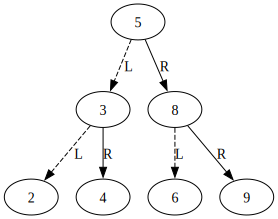

In [7]:
abr = ABR()
abr = abr.ajout_liste([5, 3, 8, 2, 4, 6, 9])

dot = abr.visualiser_arbre()
dot 

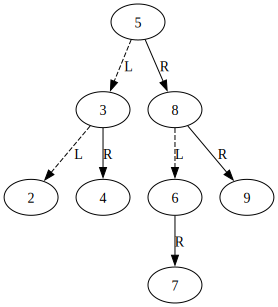

In [8]:
abr = abr.ajout(7)

dot = abr.visualiser_arbre()
dot 

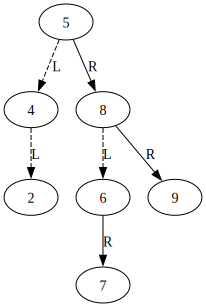

In [9]:
A = abr.supprime(3)
dot = A.visualiser_arbre()
dot

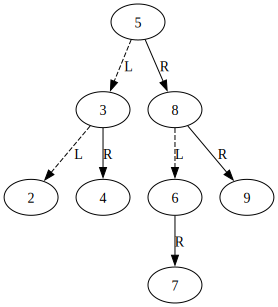

In [10]:
dot = abr.visualiser_arbre()
dot

## Arbre 2-3-4 <a class="anchor" id="arbre234"></a>

## Arbre-B <a class="anchor" id="arbreb"></a>

## Arbre AVL <a class="anchor" id="avl"></a>

In [16]:
class ArbreAVL:
    def __init__(self):
        self.racine = None
    
    ## AJOUT
    
    def ajout_liste(self, cles : list) -> 'ArbreAVL':
        '''AVL * int list -> ArbreAVL'''
        '''Ajoute une liste de clés à l'arbre binaire'''
        avl = self
        for cle in cles:
            avl = avl.ajout(cle)
        return avl
    
    def ajout(self, cle : int) -> 'ArbreAVL' :
        '''AVL * int -> ArbreAVL'''
        '''Ajoute une clé à l'arbre binaire'''
        avl = ArbreAVL()
        avl.racine = self._ajout(self.racine, cle)
        return avl

    def _ajout(self, noeud : ArbreBinaire, cle : int) -> ArbreBinaire :
        '''AVL * ArbreBinaire * int -> ArbreBinaire'''
        '''Ajoute une clé à l'arbre binaire'''
        if noeud is None: # si l'arbre est vide, on crée un nouveau noeud 
            return ArbreBinaire(cle)
        elif cle == noeud.cle: # si la clé est déjà dans l'arbre, on ne fait rien 
            return ArbreBinaire(noeud.cle, noeud.gauche, noeud.droite, noeud.hauteur)
        elif cle < noeud.cle: # si la clé est inférieure à la clé du noeud, on ajoute la clé dans le sous-arbre gauche
            nouveauGauche = self._ajout(noeud.gauche, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, nouveauGauche, noeud.droite)
        else: # si la clé est supérieure à la clé du noeud, on ajoute la clé dans le sous-arbre droit
            novueauDroite = self._ajout(noeud.droite, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, novueauDroite)

        nouveauNoeud.hauteur = 1 + max(self._hauteur(nouveauNoeud.gauche), self._hauteur(nouveauNoeud.droite))
        return self._equilibrage(nouveauNoeud, cle)
    
    #SUPPRESSION
    def supprime(self, cle : int) -> 'ArbreAVL':
        '''AVL * int -> ArbreAVL'''
        '''Supprime une clé de l'arbre binaire'''
        avl = ArbreAVL()
        avl.racine = self._supprime(self.racine, cle)
        return avl
    
    def _supprime(self, noeud : 'ArbreBinaire', cle : int) -> 'ArbreBinaire':
        '''AVL * ArbreBinaire * int -> ArbreBinaire'''
        '''Supprime une clé de l'arbre binaire'''
        if noeud is None: # si l'arbre est vide, on ne fait rien
            return noeud
        elif cle < noeud.cle: # si la clé est inférieure à la clé du noeud, on supprime la clé dans le sous-arbre gauche
            nouveauNoeud = ArbreBinaire(noeud.cle, self._supprime(noeud.gauche, cle), noeud.droite)
        elif cle > noeud.cle: # si la clé est supérieure à la clé du noeud, on supprime la clé dans le sous-arbre droit
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, self._supprime(noeud.droite, cle))
        else: # sinon la clé est égale à la clé du noeud, on supprime le noeud et on le remplace par le sous-arbre gauche ou droit
            # si un des sous-arbres est vide, on remplace le noeud par l'autre sous-arbre
            if noeud.gauche is None: 
                return noeud.droite
            elif noeud.droite is None: 
                return noeud.gauche

            # sinon, on remplace le noeud par le noeud minimal du sous-arbre droit
            min_noeud = self._min_noeud(noeud.droite)
            nouveauNoeud = ArbreBinaire(min_noeud.cle, noeud.gauche, self._supprime(noeud.droite, min_noeud.cle))

        nouveauNoeud.hauteur = 1 + max(self._hauteur(nouveauNoeud.gauche), self._hauteur(nouveauNoeud.droite))
        return self._equilibrage(nouveauNoeud, cle)
    
    #RECHERCHE
    def recherche(self, cle : int) -> bool:
        '''AVL * int -> bool'''
        '''Recherche une clé dans l'arbre binaire'''
        return self._recherche(self.racine, cle)
    
    def _recherche(self, noeud : 'ArbreBinaire', cle : int) -> bool:
        '''AVL * ArbreBinaire * int -> bool'''
        '''Recherche une clé dans l'arbre binaire'''
        if noeud is None:
            return False
        elif cle < noeud.cle:
            return self._recherche(noeud.gauche, cle)
        elif cle > noeud.cle:
            return self._recherche(noeud.droite, cle)
        else:
            return True
        
    # HAUTEUR
    def hauteur(self) -> int:
        '''AVL -> int'''
        '''Retourne la hauteur de l'arbre binaire'''
        return self._hauteur(self.racine)
    
    def _hauteur(self, noeud: ArbreBinaire) -> int:
        '''AVL * ArbreBinaire -> int'''
        '''Retourne la hauteur du noeud donné'''
        if noeud is None:
            return 0
        return noeud.hauteur
    
    #FONCTIONS UTILES / PRIMITIVES
    def _min_noeud(self, noeud: ArbreBinaire) -> ArbreBinaire:
        '''AVL * ArbreBinaire -> ArbreBinaire'''
        '''Retourne le noeud minimal = le plus à gauche de l'arbre binaire'''
        if noeud is None or noeud.gauche is None:
            return noeud
        return self._min_noeud(noeud.gauche)
    
    def _equilibre(self, noeud: ArbreBinaire) -> int:
        '''AVL * ArbreBinaire -> int'''
        '''Retourne l'équilibre du noeud donné = différence de hauteur entre les sous-arbres gauche et droit)'''
        if noeud is None:
            return 0
        return self._hauteur(noeud.gauche) - self._hauteur(noeud.droite)

    def _equilibrage(self, noeud: ArbreBinaire, cle: int) -> ArbreBinaire:
        '''AVL * ArbreBinaire * int -> ArbreBinaire'''
        '''Équilibre l'arbre binaire en fonction de la clé donnée'''
        equilibrage = self._equilibre(noeud)

        if equilibrage > 1:
            if cle < noeud.gauche.cle:
                return self._rotation_droite(noeud)
            else:
                return self._rotation_gauche_droite(noeud)
        elif equilibrage < -1:
            if cle > noeud.droite.cle:
                return self._rotation_gauche(noeud)
            else:
                return self._rotation_droite_gauche(noeud)

        return noeud
    
    def _rotation_gauche(self, noeud : ArbreBinaire) -> ArbreBinaire:
        '''AVL * ArbreBinaire -> ArbreBinaire'''
        '''Effectue une rotation gauche sur le noeud donné'''
        y = noeud.droite
        T2 = y.gauche

        y.gauche = noeud
        noeud.droite = T2

        noeud.hauteur = 1 + max(self._hauteur(noeud.gauche), self._hauteur(noeud.droite))
        y.hauteur = 1 + max(self._hauteur(y.gauche), self._hauteur(y.droite))

        return y

    def _rotation_droite(self, noeud : ArbreBinaire) -> ArbreBinaire:
        '''AVL * ArbreBinaire -> ArbreBinaire'''
        '''Effectue une rotation droite sur le noeud donné'''
        y = noeud.gauche
        T3 = y.droite

        y.droite = noeud
        noeud.gauche = T3

        noeud.hauteur = 1 + max(self._hauteur(noeud.gauche), self._hauteur(noeud.droite))
        y.hauteur = 1 + max(self._hauteur(y.gauche), self._hauteur(y.droite))

        return y
    def _rotation_gauche_droite(self, noeud: ArbreBinaire) -> ArbreBinaire:
        '''AVL * ArbreBinaire -> ArbreBinaire'''
        '''Effectue une rotation gauche-droite sur le noeud donné'''
        noeud.gauche = self._rotation_gauche(noeud.gauche)
        return self._rotation_droite(noeud)
    
    def _rotation_droite_gauche(self, noeud: ArbreBinaire) -> ArbreBinaire:
        '''AVL * ArbreBinaire -> ArbreBinaire'''    
        '''Effectue une rotation droite-gauche sur le noeud donné'''
        noeud.droite = self._rotation_droite(noeud.droite)
        return self._rotation_gauche(noeud)
    
    def visualiser_arbre(self):
        '''AVL -> dot'''
        '''Affiche l'arbre binaire'''
        return graph_arbre_binaire(self.racine)
    

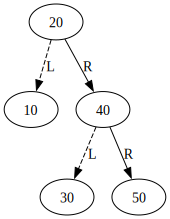

In [17]:
# Crée une instance d'un AVL
avl = ArbreAVL()

# Ajoute des clés à l'AVL
avl = avl.ajout_liste([10, 20, 30, 40, 50])

# # Visualize the AVL tree
dot = avl.visualiser_arbre()
dot
# dot.render('avl_tree_example', format='png', view=True)

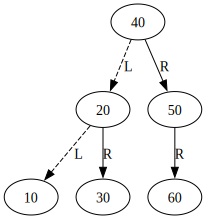

In [20]:
# ajouter un noeud à l'arbre A
A = avl.ajout(60)
dot = A.visualiser_arbre()
dot

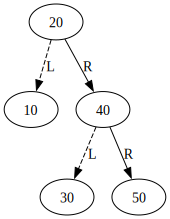

In [21]:
# non modifie 
dot = avl.visualiser_arbre()
dot

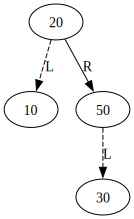

In [22]:
# Test supprimer une clé de l'arbre A
A = avl.supprime(40)
dot = A.visualiser_arbre()
dot

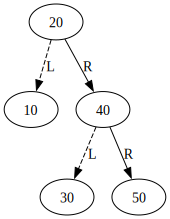

In [23]:
# arbre non modifié après la suppression
dot = avl.visualiser_arbre()
dot

In [ ]:
# Recherche sur l'arbre A
print(A.recherche(30))  # Output: True
print(A.recherche(40))  # Output: False

True
False


In [13]:
# Recherche sur l'arbre initial
print(avl.recherche(30))  # Output: True
print(avl.recherche(40))  # Output: True

True
True


## Arbre Auto-adaptatif (Splay-tree) <a class="anchor" id="splaytree"></a>

In [22]:
class ArbreBinaire:
    def __init__(self, cle, gauche=None, droite=None):
        self.cle = cle
        self.gauche = gauche
        self.droite = droite

class ArbreSplay:
    def __init__(self):
        self.racine = None
    #AJOUT
    def ajout_liste(self, cles : list) -> 'ArbreSplay':
        '''ArbreSplay * int list -> ArbreSplay'''
        '''Ajoute une liste de clés dans l'arbre splay.'''
        splay = self
        for cle in cles:
            splay = splay.ajout(cle)
        return splay

    def ajout(self, cle : int) -> 'ArbreSplay':
        '''ArbreSplay * int -> ArbreSplay'''
        '''Ajoute une clé dans l'arbre splay.'''
        splay = ArbreSplay()
        splay.racine = self._ajout(self.racine, cle)
        return splay
        
    def _ajout(self, noeud : ArbreBinaire, cle : int) -> 'ArbreBinaire':
        '''ArbreSplay * ArbreBinaire * int -> ArbreBinaire'''
        '''Ajoute une clé dans l'arbre binaire de recherche et renvoie l'arbre résultant.'''
        if noeud is None:
            return ArbreBinaire(cle)
        elif cle == noeud.cle:
            return noeud
        elif cle < noeud.cle:
            nouveauGauche = self._ajout(noeud.gauche, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, nouveauGauche, noeud.droite)
        else:
            nouveauDroite = self._ajout(noeud.droite, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, nouveauDroite)
        return self._splay(nouveauNoeud, cle)
    #SUPPRESSION
    def supprime(self, cle : int) -> 'ArbreSplay':
        '''ArbreSplay * int -> ArbreSplay'''
        '''Supprime une clé de l'arbre splay.'''
        splay = ArbreSplay()
        splay.racine = self._supprime(self.racine, cle)
        return splay
        
    def _supprime(self, noeud : ArbreBinaire, cle : int) -> 'ArbreBinaire':
        '''ArbreSplay * ArbreBinaire * int -> ArbreBinaire'''
        '''Supprime une clé de l'arbre binaire de recherche et renvoie l'arbre résultant.'''
        if noeud is None:
            return noeud
        elif cle < noeud.cle:
            nouveauGauche = self._supprime(noeud.gauche, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, nouveauGauche, noeud.droite)
        elif cle > noeud.cle:
            nouveauDroite = self._supprime(noeud.droite, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, nouveauDroite)
        else:
            if noeud.gauche is None:
                return noeud.droite
            elif noeud.droite is None:
                return noeud.gauche
            
            min_noeud = self._min_noeud(noeud.droite)
            nouveauNoeud = ArbreBinaire(min_noeud.cle, noeud.gauche, self._supprime(noeud.droite, min_noeud.cle))
        return nouveauNoeud
    
    #RECHERCHE
    def recherche(self, cle : int) -> (bool, 'ArbreSplay'):
        '''ArbreSplay * int -> bool * ArbreSplay'''
        '''Recherche une clé dans l'arbre splay et renvoie un booléen indiquant si la clé est présente et l'arbre résultant.'''
        splay = ArbreSplay()
        splay.racine = self._recherche(self.racine, cle)
        return splay.racine is not None and splay.racine.cle == cle, splay

    def _recherche(self, noeud : ArbreBinaire, cle : int) -> 'ArbreBinaire':
        '''ArbreSplay * ArbreBinaire * int -> ArbreBinaire'''
        '''Recherche une clé dans l'arbre binaire de recherche et renvoie le noeud contenant la clé ou le noeud parent si la clé n'est pas présente.'''
        
        #créer une copy de l'arbre
        cle = noeud.cle
        gauche = noeud.gauche
        droite = noeud.droite
        
        nouveauNoeud = ArbreBinaire(cle, gauche, droite)
        return self._splay(nouveauNoeud, cle)
            
    #FONCTIONS UTILES / PRIMITIVES
    def _splay(self, noeud : ArbreBinaire, cle : int) -> 'ArbreBinaire':
        '''ArbreSplay * ArbreBinaire * int -> ArbreBinaire'''
        '''Effectue une opération de splay sur l'arbre binaire de recherche (remonte le noeud à la racine) et renvoie l'arbre résultant.'''
        if noeud is None or noeud.cle == cle:
            return noeud
        elif cle < noeud.cle:
            if noeud.gauche is None:
                return noeud
            if cle < noeud.gauche.cle:
                noeud.gauche.gauche = self._splay(noeud.gauche.gauche, cle)
                noeud = self._rotation_droite(noeud)
            elif cle > noeud.gauche.cle:
                noeud.gauche.droite = self._splay(noeud.gauche.droite, cle)
                if noeud.gauche.droite is not None:
                    noeud.gauche = self._rotation_gauche(noeud.gauche)
            if noeud.gauche is not None:
                return self._rotation_droite(noeud)
            else:
                return noeud
        else:
            if noeud.droite is None:
                return noeud
            if cle < noeud.droite.cle:
                noeud.droite.gauche = self._splay(noeud.droite.gauche, cle)
                if noeud.droite.gauche is not None:
                    noeud.droite = self._rotation_droite(noeud.droite)
            elif cle > noeud.droite.cle:
                noeud.droite.droite = self._splay(noeud.droite.droite, cle)
                noeud = self._rotation_gauche(noeud)
            if noeud.droite is not None:
                return self._rotation_gauche(noeud)
            else:
                return noeud

    def _rotation_gauche(self, noeud : ArbreBinaire) -> 'ArbreBinaire':
        '''ArbreBinaire -> ArbreBinaire'''
        '''Effectue une rotation gauche sur l'arbre binaire de recherche et renvoie l'arbre résultant.'''
        y = noeud.droite
        noeud.droite = y.gauche
        y.gauche = noeud
        return y

    def _rotation_droite(self, noeud : ArbreBinaire) -> 'ArbreBinaire':
        '''ArbreBinaire -> ArbreBinaire'''
        '''Effectue une rotation droite sur l'arbre binaire de recherche et renvoie l'arbre résultant.'''
        x = noeud.gauche
        noeud.gauche = x.droite
        x.droite = noeud
        return x

    def _min_noeud(self, noeud : ArbreBinaire) -> 'ArbreBinaire':
        '''ArbreBinaire -> ArbreBinaire'''
        '''Renvoie le noeud contenant la clé minimale de l'arbre binaire de recherche.'''
        if noeud is None or noeud.gauche is None:
            return noeud
        return self._min_noeud(noeud.gauche)
    
    def visualiser_arbre(self):
        '''ArbreSplay -> dot'''
        '''Affiche l'arbre binaire'''
        return graph_arbre_binaire(self.racine)

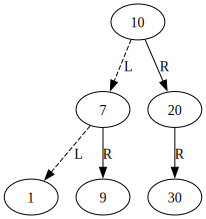

In [23]:
# Create an instance of ArbreSplay
splay_tree = ArbreSplay()

# ajout noeuds into the Splay tree
splay_tree = splay_tree.ajout_liste([1, 9, 7, 30, 20, 10])
dot = splay_tree.visualiser_arbre()
dot


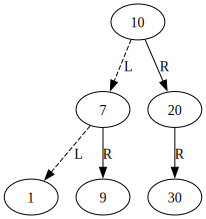

In [25]:
b,A = splay_tree.recherche(9)
dot = A.visualiser_arbre() # non modifié normalement
dot

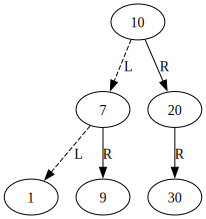

In [15]:
dot = A.visualiser_arbre()
dot

In [16]:
b

False

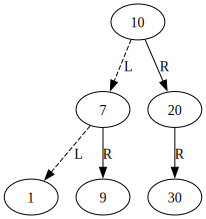

In [17]:
A = splay_tree.ajout(50)
dot = splay_tree.visualiser_arbre()
dot

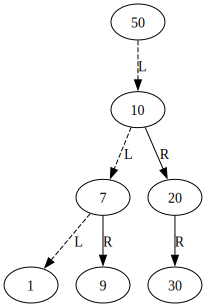

In [18]:
dot = A.visualiser_arbre()
dot

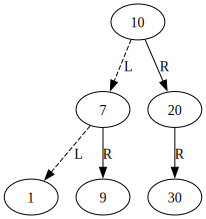

In [19]:
dot = splay_tree.visualiser_arbre() # non modifié normalement
dot

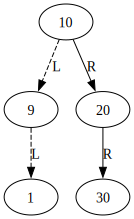

In [20]:
A = splay_tree.supprime(7)
dot = A.visualiser_arbre()
dot

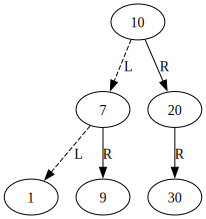

In [21]:
dot = splay_tree.visualiser_arbre() # non modifié normalement
dot

## Arbre Digital (DST) <a class="anchor" id="dst"></a>

In [ ]:
class ArbreBinaire:
    def __init__(self,cle , gauche = None, droite = None):
        self.cle = cle
        self.gauche = gauche
        self.droite = droite
        
class DST :
    def __init__(self, dico , c = None):
        self.dico = dico  # Exemple : dico = {'a':'01','b':'11','c':'00','d':'10'}
        self.racine = None            

    # def ArbreVide(self):
    #     return None

    # def EstArbreVide(self):
    #     return self.racine is None
    
    # def Racine(self):
    #     return self.racine.cle
    
    # def SousArbreGauche(self):
    #     return self.racine.gauche
    
    # def SousArbreDroit(self):
    #     return self.racine.droite

    def car(self, c , i):
        """DST * str * int -> int/None"""
        """Renvoie le i-ème caractère de l'encodage de c, lorsque c existe dans le dictionnaire, None sinon"""
        for k , v in self.dico.items():
            if k == c and len(v)-1 >= i:
                res= v[i]
                return int(res)
        return None

    def duplique(self , A): #A est un arbre binaire
        """DST * ArbreBinaire -> ArbreBinaire"""
        """Renvoie une copie de l'arbre binaire A"""
        #print("passage ?")
        if A is None:
            return None
        else:
            return ArbreBinaire(A.cle, self.duplique(A.gauche), self.duplique(A.droite))
        

    def ajout(self, c ): #c est un caractère
        """DST * str -> ArbreBinaire"""
        """Renvoie un arbre binaire contenant le caractère c"""
        return self._ajout(c , 0 , self.racine)

    def _ajout(self, c , i , A): #A est un arbre binaire
        """DST * str * int * ArbreBinaire -> ArbreBinaire"""
        """Renvoie un arbre binaire contenant le caractère c"""
        if A is None:
            return ArbreBinaire(c, None, None)

        if c == A.cle:
            return A
        if self.car(c,i) == 0 :
            newD = self.duplique(A.droite)
            return ArbreBinaire(A.cle, self._ajout(c , i+1 , A.gauche), newD)
        
        if self.car(c,i) == 1 :
            newG = self.duplique(A.gauche)
            return ArbreBinaire(A.cle, newG, self._ajout(c , i+1 , A.droite))

        return A # Dans le cas ou le caractère n'est pas trouvé



    def recherche(self, c): #c est un caractère
        """DST * str -> bool"""
        """Renvoie True si le caractère c est dans l'arbre, False sinon"""
        return self._recherche( self.racine, c , 0)
    
    def _recherche(self, A,  c , i):    #A est un arbre binaire
        """DST * ArbreBinaire * str * int -> bool"""
        """Renvoie True si le caractère c est dans l'arbre, False sinon"""
        if A is None: 
            return False
        if c == A.cle:    
            return True
        if self.car(c,i) == 0 :  
            return self._recherche(A.gauche , c , i+1)
        else :     
            return self._recherche(A.droite , c , i+1)
        
        

    def supprime(self, c): #c est un caractère
        """DST * str -> ArrbreBinaire"""
        """Supprime le caractère c de l'arbre binaire"""
        return self._supprime(self.racine, c , 0)
    

    def _supprime(self, A , c , i): # CBinaire est un caractère binaire, exemple : '0101'
        """DST * ArbreBinaire * str * int -> ArbreBinaire"""
        """Supprime le caractère c de l'arbre binaire"""
        if A is None:   #Si l'arbre est vide
            return None
        
        if c == A.cle:      #Si le caractère est trouvé, on verifie tous les cas
            #cas si on est sur la racine
            if A.gauche is None and A.droite is None and self.racine.cle == A.cle and self.racine.gauche is None and self.racine.droite is None:
                return None
            if A.gauche is None and self.racine.cle == A.cle and self.racine.gauche == A.gauche:
                return self.duplique(A.droite)
            
            if A.droite is None and self.racine.cle == A.cle and self.racine.droite == A.droite:
                #return ArbreBinaire(A.cle, A.gauche, None)
                return self.duplique(A.gauche)
            
            #cas hors de la racine
            if A.gauche is None and A.droite is None:
                return None
            if A.gauche is None:  
                return self.duplique(A.droite) 
            if A.droite is None:    
                return self.duplique(A.gauche)
            else:   #Si le noeud a deux fils
                noeud = self.noeud_min(A.droite)
                newG = self.duplique(A.gauche)
                return ArbreBinaire(noeud.cle, newG, self._supprime(A.droite,noeud.cle , i+1) )
            
        if self.car(c,i) == 0 :  
            newD = self.duplique(A.droite)
            return ArbreBinaire(A.cle, self._supprime(A.gauche , c , i+1), newD)
        else :#self.car(c,i) == 1:     
            newG = self.duplique(A.gauche)
            return ArbreBinaire(A.cle, newG, self._supprime(A.droite , c , i+1))



    def noeud_min(self, A ):    #A est un arbre binaire
        """DST * ArbreBinaire -> ArbreBinaire"""
        """Renvoie le noeud le plus à gauche, qui est le plus petit noeud de l'arbre binaire A"""
        cour = A  
        while (cour.gauche is not None): 
            cour = cour.gauche
        return cour
        

    def construction(self):
        """DST -> DST"""
        """Construit l'arbre binaire à partir du dictionnaire"""
        for c in self.dico:
            self.racine = self.ajout(c)
        return self


    def visualiser_arbre(self):
        """DST -> Digraph"""
        """Renvoie un Digraph qui représente l'arbre binaire"""
        dot = Digraph()

        cpt = 0

        def generer_graphique(noeud):
            nonlocal cpt
            if noeud is not None:
                dot.node(str(noeud.cle))
                if noeud.gauche is not None:
                    dot.edge(str(noeud.cle), str(noeud.gauche.cle) , label = "0" , fontsize="10")
                    generer_graphique(noeud.gauche)
                else:
                    cpt += 1
                    dot.node(f"empty_{cpt}", shape="point", fillcolor="white" , width="0.5")
                    dot.edge(str(noeud.cle), f"empty_{cpt}" , label = "0" , fontsize="10")
                if noeud.droite is not None:
                    dot.edge(str(noeud.cle), str(noeud.droite.cle) , label = "1" , fontsize="10" )
                    generer_graphique(noeud.droite)
                else:
                    cpt += 1
                    dot.node(f"empty_{cpt}", shape="point", fillcolor="white" , width="0.5")
                    dot.edge(str(noeud.cle), f"empty_{cpt}" , label = "1" , fontsize="10")

        generer_graphique(self.racine)
        return dot


    def afficher_arbre(self , arbre, niveau=0):
        if arbre is not None:
            self.afficher_arbre(arbre.droite, niveau + 1)
            if niveau > 0:
                print('   ' * (niveau - 1) + '|--', end='')
            print(str(arbre.cle))
            self.afficher_arbre(arbre.gauche, niveau + 1)

## Arbre Lexicographique <a class="anchor" id="lexico"></a>

In [ ]:
class ArbreBinaire:
    def __init__(self,cle =None , gauche = None, droite = None):
        self.cle = cle
        self.gauche = gauche
        self.droite = droite


class TrieBin :
    def __init__(self, dico , c = None):
        self.dico = dico  # Exemple : dico = {'a':'01','b':'11','c':'00','d':'10'}
        if c is None :  #On suppose que c est un caractère de l'alphabet 
            self.racine = None
        else :  
            self.racine = ArbreBinaire(c)

    def car(self, c , i):
        """TrieBin * str * int -> int/None"""
        """Renvoie le i-ème caractère de l'encodage de c, lorsque c existe dans le dictionnaire, None sinon."""
        for k , v in self.dico.items():
            if k == c and len(v)-1 >= i:
                res= v[i]
                return int(res)
        return None

    def ajout(self, c):
        """TrieBin * str -> ArbreBinaire"""
        """Renvoie  l'arbre binaire résultant de l'insertion de c"""
        return self._ajout(c , 0, self.racine)
    
    def EstVide(self):
        return self.racine is None

    def duplique(self, A):
        """TrieBin * ArbreBinaire -> ArbreBinaire/None"""
        """Renvoie une copie de l'arbre A, None si A est vide"""
        if A is None:
            return None
        return ArbreBinaire(A.cle, self.duplique(A.gauche), self.duplique(A.droite))
    

    def _ajout(self , c, i , A):
        """"TrieBin * str * int * ArbreBinaire -> ArbreBinaire"""
        """Renvoie le trie binaire en ajoutant le caractère c à l'arbre A, et i est l'indice du caractère c dans l'encodage binaire de c"""
        if A is None:
            return ArbreBinaire(c)
        if A.gauche is None and A.droite is None:
            if c == A.cle:
                return A
            else:
                return self.split( c, A.cle , i)
        if self.car(c, i) == 0:
           newD = self.duplique(A.droite)
           return ArbreBinaire(A.cle, self._ajout(c, i+1, A.gauche), newD)
        else:
            newG = self.duplique(A.gauche)
            return ArbreBinaire(A.cle, newG , self._ajout(c, i+1, A.droite))


    # Lorsqu'on ajoute un caractère qui à le meme prefixe qu'un autre caractère, on doit diviser le noeud en deux
    def split(self, c1 , c2, i): # c1 est un caractère deja dans l'arbre, c2 est un caractère à ajout
        """TrieBin * str * str * int -> ArbreBinaire"""
        """Retourne le trie binaire contenant c1 et c2"""
        if self.car(c1,i) == self.car(c2,i) == 0:
            return ArbreBinaire( '*' , self.split(c1, c2, i+1), None)
        if self.car(c1,i) == self.car(c2,i) == 1:
            return ArbreBinaire( '*' , None, self.split(c1, c2, i+1))
        if self.car(c1,i) == 0 and self.car(c2,i) == 1:
            return ArbreBinaire( '*' , ArbreBinaire(c1), ArbreBinaire(c2))
        if self.car(c1,i) == 1 and self.car(c2,i) == 0:
            return ArbreBinaire( '*' , ArbreBinaire(c2), ArbreBinaire(c1))
                

    def recherche(self, c):
        """TrieBin * str -> bool"""
        """Renvoie True si c est dans le trie binaire, False sinon"""
        return self._recherche(self.racine, c, 0)
    

    def _recherche(self, arbre, c, i):
        """TrieBin * ArbreBinaire * str * int -> bool"""
        """Renvoie True si c est dans le trie binaire, False sinon"""
        if arbre is None:
            return False
        if arbre.cle == c:
            return True
        if self.car(c, i) == 0:
            return self._recherche(arbre.gauche, c, i + 1)
        else:
            return self._recherche(arbre.droite, c, i + 1)


    def supprime(self, c):
        """TrieBin * str -> TrieBin"""
        """Renvoie le trie binaire après la suppression de c"""
        return self._supprime(self.racine, c, 0)
    

    def _supprime(self, arbre, c, i):
        """TrieBin * ArbreBinaire * str * int -> ArbreBinaire/None"""
        """Renvoie le trie binaire après la suppression de c"""
        res = arbre
        if arbre is None:
            return None
        if arbre.cle == c:
            if arbre.gauche is None and arbre.droite is None:
                return None
            if arbre.gauche is None:
                newDD = self.duplique(arbre.droite.droite)
                newDG = self.duplique(arbre.droite.gauche)
                res = ArbreBinaire(arbre.droite.cle, newDG, newDD)
                #res = ArbreBinaire(arbre.droite.cle, arbre.droite.gauche, arbre.droite.droite)
            if arbre.droite is None:
                newGG = self.duplique(arbre.gauche.gauche)
                newGD = self.duplique(arbre.gauche.droite)
                res = ArbreBinaire(arbre.gauche.cle, newGG, newGD)
                #res = ArbreBinaire(arbre.gauche.cle, arbre.gauche.gauche, arbre.gauche.droite)

        if self.car(c, i) == 0:
            newD = self.duplique(arbre.droite)
            res = ArbreBinaire(arbre.cle, self._supprime(arbre.gauche, c, i + 1), newD)
        elif self.car(c, i) == 1:
            newG = self.duplique(arbre.gauche)
            res = ArbreBinaire(arbre.cle, newG, self._supprime(arbre.droite, c, i + 1))

        # Remettre à jour l'arbre après la suppression
        if res.cle == '*' and res.gauche is None and res.droite is None:
            if self.verifierEnfant(res) == 0: # Si l'arbre n'a pas d'enfant
                return None
        
        if res.cle == '*' and res.gauche is not None and res.droite is None:
            if self.verifierEnfant(res) == 1: # Si l'arbre a un seul enfant, on peut le remonter 
                return res.gauche   #pas besoin de dupliquer car on a déjà dupliqué l'arbre avant
        
        if res.cle == '*' and res.gauche is None and res.droite is not None:
            if self.verifierEnfant(res) == 1: # Si l'arbre a un seul enfant, on peut le remonter
                return res.droite   #pas besoin de dupliquer car on a déjà dupliqué l'arbre avant
        
        return res

    def verifierEnfant(self, arbre):
        """TrieBin * ArbreBinaire -> int"""
        """retourne le nombre d'enfants de l'arbre"""
        if arbre is None:
            return 0
        if arbre.gauche is None and arbre.droite is None:
            return 1
        return self.verifierEnfant(arbre.gauche) + self.verifierEnfant(arbre.droite)



    def construction(self):
        """TrieBin -> TrieBin"""
        """Renvoie le trie binaire construit à partir du dictionnaire"""
        for i in self.dico.keys():
            self.racine = self.ajout(i)
        return self



    def visualiser_arbre(self):
        dot = Digraph()
        compteur = 1

        def generer_graphique(noeud):
            nonlocal dot, compteur
            if noeud is not None:
                tmp = noeud.cle
                cle = str(noeud.cle)
                if '*' in cle:
                    cle = '*'+str(compteur)
                    compteur += 1
                dot.node(cle , label= cle if tmp != '*' else ' ' , width="0.5" if tmp == '*' else '')

            
                if noeud.gauche is not None:
                    if '*' in noeud.gauche.cle:
                        compteur += 1
                        node_g = '*'+str(compteur)
                        dot.edge(cle , node_g , label = "0" , fontsize="10")
                    else:
                        dot.edge(cle , str(noeud.gauche.cle) , label = "0" , fontsize="10")
                    generer_graphique(noeud.gauche)
                elif noeud.gauche is None and noeud.droite is not None:
                    compteur += 1
                    node_g = '*'+str(compteur)
                    dot.node(node_g , label= ' ' , width="0.5")
                    dot.edge(cle , node_g , label = "0" , fontsize="10")


                if noeud.droite is not None:
                    if '*' in noeud.droite.cle:
                        compteur += 1
                        node_d = '*'+str(compteur)
                        dot.edge(cle , node_d , label = "1" , fontsize="10")
                    else:
                        dot.edge(cle , str(noeud.droite.cle) , label = "1" , fontsize="10")
                    generer_graphique(noeud.droite)
                elif noeud.droite is None and noeud.gauche is not None:
                    compteur += 1
                    node_d = '*'+str(compteur)
                    dot.node(node_d , label= ' ' , width="0.5")
                    dot.edge(cle , node_d , label = "1" , fontsize="10")

        generer_graphique(self.racine)
        return dot


    def afficher_arbre(self , arbre, niveau=0):
        if arbre is not None:
            self.afficher_arbre(arbre.droite, niveau + 1)
            if niveau > 0:
                print('   ' * (niveau - 1) + '|--', end='')
            print(str(arbre.cle))
            self.afficher_arbre(arbre.gauche, niveau + 1)

## R-Trie <a class="anchor" id="rtrie"></a>

## Trie Hybride <a class="anchor" id="triehybr"></a>

In [ ]:
class TrieH:
    def __init__(self , c , inf, eq , sup, v=None ):
        self.c = c
        self.inf = inf
        self.eq = eq
        self.sup = sup
        self.v = v



class TH:
    def __init__(self):
        self.racine = None
    
    def lg(self , mot):
        """TH * str -> int"""
        """Retourne la longueur d'un mot"""
        return len(mot)

    def prem(self , mot):
        """TH * str -> str"""
        """Retourne le premier caractère d'un mot"""
        return mot[0]
    
    def reste(self , mot):
        """TH * str -> str"""
        """Retourne le reste d'un mot sans le premier caractère"""
        return mot[1:]
    
    def duplique(self, A):
        """TH * TrieH -> TrieH"""
        """Duplique un arbre hybride"""
        if A is None:
            return None
        else:
            return TrieH(A.c, self.duplique(A.inf), self.duplique(A.eq), self.duplique(A.sup), A.v)


    def ajout(self, mot, A , v):
        """TH * str * TrieH * int -> TrieH"""
        """Ajoute un mot dans un arbre hybride"""
        if A is None:
            if self.lg(mot) == 1:
                return TrieH(self.prem(mot) , None , None , None , v)
            else:
                return TrieH(self.prem(mot) , None , self.ajout(self.reste(mot), None , v) , None , None)
        else:
            p = self.prem(mot)
            if p < A.c:
                # A.inf = self.ajout( mot , A.inf , v)
                newEq = self.duplique(A.eq)
                newSup = self.duplique(A.sup)
                return TrieH(A.c , self.ajout( mot , A.inf , v) , newEq , newSup , A.v)
            if p > A.c:
                #print("sup")
                # A.sup = self.ajout( mot , A.sup , v)
                newInf = self.duplique(A.inf)
                newEq = self.duplique(A.eq)
                return TrieH(A.c , newInf , newEq , self.ajout( mot , A.sup , v) , A.v)
                #return TrieH(A.c , A.inf , A.eq , self.ajout( mot , A.sup , v) , A.v)
            newInf = self.duplique(A.inf)
            newSup = self.duplique(A.sup)
            return TrieH(A.c , newInf , self.ajout( self.reste(mot) , A.eq , v) , newSup , A.v)



    # recherche un mot dans le trie hybride
    def recherche(self, mot, A):
        """TH * str * TrieH -> bool"""
        """Recherche un mot dans un arbre hybride et retourne True si le mot est trouvé, False sinon"""
        if A is None:
            return False
        if self.lg(mot) == 1 and A.c == mot and A.v is not None:
            return True
        p = self.prem(mot)
        if p < A.c:
            return self.recherche(mot, A.inf)
        elif p > A.c:
            return self.recherche(mot, A.sup)
        else:
            return self.recherche(self.reste(mot), A.eq)
        
        
    def supprime(self, mot, A):
        """TH * str * TrieH -> TrieH"""
        """Supprime un mot dans un arbre hybride"""
        res = A
        if A is None:
            return None
        p = self.prem(mot)
        if p < A.c:
            newEq = self.duplique(A.eq)
            newSup = self.duplique(A.sup)
            res = TrieH(A.c, self.supprime(mot, A.inf), newEq, newSup, A.v)
            
        elif p > A.c:
            newInf = self.duplique(A.inf)
            newEq = self.duplique(A.eq)
            res = TrieH(A.c, newInf, newEq, self.supprime(mot, A.sup), A.v)
            
        elif p == A.c:
            if self.lg(mot) == 1:
                if A.v is not None:
                    A.v = None
                    
            else:
                newInf = self.duplique(A.inf)
                newSup = self.duplique(A.sup)
                res = TrieH(A.c, newInf, self.supprime(self.reste(mot), A.eq), newSup, A.v)

        # Cas de suppression de la racine
        if A.c == self.racine.c and A.eq is None and A.inf is None and A.sup is None and A.v is None and self.racine.eq == A.eq and self.racine.inf == A.inf and self.racine.sup == A.sup and self.racine.v == A.v:
            return None

        # Cas de suppression hors de la racine
        if self.prem(mot) == res.c and res.eq is None and res.inf is None and res.sup is None and res.v is None:
            return None
            
        if res.inf is None and res.eq is None and res.sup is None and res.v is None:
            return None
        
        if res.inf is not None and res.eq is None and res.sup is not None:
            return self.Fusion(res.inf, res.sup)
  
        if res.inf is not None and res.eq is None and res.sup is None:
            return res.inf 
        if res.inf is None and res.eq is None and res.sup is not None:
            return res.sup  
        return res 





    # Fusionner deux arbres
    def Fusion(self, A, B): 
        """TH * TrieH * TrieH -> TrieH"""
        """Fusionne deux arbres hybrides"""
        if A is None:
            return B
        if B is None:
            return A
        if A is not None and B is not None:
            if A.c < B.c:
                newInf = self.duplique(A.inf)
                newEq = self.duplique(A.eq)
                return TrieH(A.c, newInf, newEq, self.Fusion(A.sup, B), A.v)
                                
            if A.c > B.c:
                newSup = self.duplique(B.sup)
                newEq = self.duplique(B.eq)
                return TrieH(B.c, self.Fusion(A, B.inf), newEq, newSup, B.v)
               
            if A.c == B.c:
                newSupA = self.duplique(A.sup)
                newInfA = self.duplique(A.inf)
                return TrieH(A.c, newInfA, self.Fusion(A.eq, B.eq), newSupA, A.v)
                
    

       
    def visualiser_arbre(self):
        dot = Digraph()
        fontsize = "10"

        def generer_graphique(A, dot=dot):
            if A is not None:
                dot.node(str(id(A)), label=f"{A.c} {({str(A.v)}) if A.v is not None else ''}")

                if A.inf is not None:
                    dot.node(str(id(A.inf)), label=f"{A.inf.c} (Inf)")
                    dot.edge(str(id(A)), str(id(A.inf)) , label="Inf", fontsize=fontsize )
                    generer_graphique(A.inf)

                if A.eq is not None:
                    dot.node(str(id(A.eq)), label=f"{A.eq.c} (Eq)")
                    dot.edge(str(id(A)), str(id(A.eq)) , label="Eq", fontsize=fontsize )
                    generer_graphique(A.eq)

                if A.sup is not None:
                    dot.node(str(id(A.sup)), label=f"{A.sup.c} (Sup)")
                    dot.edge(str(id(A)), str(id(A.sup)) , label="Sup", fontsize=fontsize )
                    generer_graphique(A.sup)

        generer_graphique(self.racine)
        return dot





def afficher_trie_hybride_arbre(A, prefixe="", est_dernier=True, lien=""):
    if A is not None:
        marker = "└── " if est_dernier else "├── "
        print(f"{prefixe}{marker}Caractère: {A.c} ({lien})", "Valeur: ", A.v if A.v is not None else "None")
        afficher_trie_hybride_arbre(A.inf, f"{prefixe}{'    ' if est_dernier else '│   '}", False, "Inf")
        afficher_trie_hybride_arbre(A.eq, f"{prefixe}{'    ' if est_dernier else '│   '}", False, "Eq")
        afficher_trie_hybride_arbre(A.sup, f"{prefixe}{'    ' if est_dernier else '│   '}", True, "Sup")
